- **Machine learning applications on text classification for companies**

The dataset that will be worked on is called "TCC.xlsx" and contains the information of the requirements, requests and petitions presented to the company SIGMA Ingeniería S.A of Manizales in the technical support area. 

The fields that will be taken into account for this work will be "description" and "category", the idea is to find the best performance technique in the classification of descriptions to implement in the company and perform the automatic classification of future requirements, it is intended that Through the predicted category, the protocols of solution to the request presented by the client are provided to offer a better quality in the response and also, reduce the time in the response by the service area and technical support of the company towards the client. 

# Libraries

In [1]:
#Classification Methods
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#NLP
import nltk 
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import spacy 
import en_core_web_sm

#Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from yellowbrick.classifier import ClassificationReport 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Tools
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from scipy.sparse import csr_matrix 
import string 
import time as tm
import os

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Class balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import ClusterCentroids 
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

# Functions

In [3]:
nlp = spacy.load("es_core_news_sm")

def lemmatizer(text):  
    doc = nlp(text)
    return ' '.join([word.lemma_ for word in doc]) 

In [4]:
def class_balance_over_sampling(features, labels, HO=False, CV=True, methods_list=["SMOTE"]):
    
    best_acc=list()
    for method in methods_list:
        if method == "RandomOverSampler":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = RandomOverSampler(random_state=21) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        elif method == "SMOTE":
            print(method)
#             print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = SMOTE(random_state=21,n_jobs=-1) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
#             print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
#             print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)

        elif method == "SMOTEN":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = SMOTEN(random_state=21,n_jobs=-1)
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        elif method == "ADASYN":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = ADASYN(random_state=21,n_jobs=-1) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        elif method == "BorderlineSMOTE":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = BorderlineSMOTE(random_state=21,n_jobs=-1) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        elif method == "KMeansSMOTE":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = KMeansSMOTE(random_state=21,n_jobs=-1, k_neighbors=np.unique(y_test).shape[0]) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        elif method == "SVMSMOTE":
            print(method)
            print("originals labels unique: ",np.unique(labels, return_counts=True)) 
            X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                                test_size=0.20, random_state=8, stratify=labels)
            sampler = SVMSMOTE(random_state=21,n_jobs=-1) 
            X_train, y_train = sampler.fit_resample(X_train, y_train)             
            print("y_train labels unique:   ",np.unique(y_train, return_counts=True))
            print("y_test labels unique:    ",np.unique(y_test, return_counts=True)) 
            classifier_metrics(X_train,X_test,y_train,y_test,HO=HO,CV=CV)
            
        else:
            continue
            


In [5]:
def classifier_metrics(X_train,X_test,y_train,y_test,HO=True,CV=False):    
    def metrics(model):
        print("\nHold-Out in process...")
        start_time = tm.time()
        model.fit(X_train, y_train) 
        TIME = tm.time() - start_time 
        print("Time, Training: {0:.4f} [seconds]".format(TIME))
        start_time = tm.time()
        y_pred = model.predict(X_test)
        TIME = tm.time() - start_time 
        print("Time, Prediction: {0:.4f} [seconds]".format(TIME))
        accuracy_s  = accuracy_score(y_test,y_pred) 
        f1_s        = f1_score(y_test,y_pred,average='weighted')
        recall_s    = recall_score(y_test,y_pred,average='weighted')
        precision_s = precision_score(y_test,y_pred,average='weighted')
        print('accuracy_score: {0:.4f}'.format(accuracy_s))
        print('f1_score: {0:.4f}'.format(f1_s))
        print('recall_score: {0:.4f}'.format(recall_s))
        print('precision_score: {0:.4f}'.format(precision_s))
        print ('\n clasification report:\n', classification_report(y_test, y_pred, digits = 4))
        print('\nCross-Validation in process...')
        start_time = tm.time() 
        kfold = model_selection.KFold(n_splits=10) # KFold(n_splits=10, shuffle = True, random_state=8)
        y_CV = np.concatenate((y_train,y_test))
        if "GaussianNB" in str(name) or "LinearDiscriminantAnalysis" in str(name):
            X_CV = np.concatenate((X_train,X_test))
            cv_results = np.array(model_selection.cross_val_score(model, X_CV, y_CV, cv=kfold, scoring='accuracy', n_jobs=-1))
        else:
            X_CV = np.concatenate((X_train.toarray(),X_test.toarray()))
            X_CV = csr_matrix(X_CV)
            cv_results = np.array(model_selection.cross_val_score(model, X_CV, y_CV, cv=kfold, scoring='accuracy', n_jobs=-1))
        
        cv_results = cv_results[np.logical_not(np.isnan(cv_results))] 
        TIME = tm.time() - start_time 
        print("Time, CV: {0:.4f} [seconds]".format(TIME))
        print('CV: {0:.4f} {1:.4f}'.format(cv_results.mean(),cv_results.std()))

    for name in classifiers:
        print ("---------------------------------------------------------------------------------\n") 
        print(str(name))
        if "GaussianNB" in str(name) or "LinearDiscriminantAnalysis" in str(name):
            X_train=csr_matrix(X_train) 
            X_test =csr_matrix(X_test) 
            X_train=X_train.toarray() 
            X_test=X_test.toarray() 
        else:
            X_train=csr_matrix(X_train)
            X_test=csr_matrix(X_test)
            
        metrics(name)
        print()
                

In [6]:
path_figures = "../images"
if not os.path.exists(path_figures):
    os.makedirs(path_figures)

# Classification report
def CR_viz():
    ax = plt.figure(figsize=(15,20)) 
    visualizer = ClassificationReport(model_selected, classes=classes, support=True,  
                                      cmap='Blues', title="Classification Report - "+model_name)
    visualizer.fit(X_train, y_train)   
    visualizer.score(X_test, y_test)      
    visualizer.poof()
    ax.show()
    ax.savefig(path_figures+"/"+model_name+"_CR"+".pdf", bbox_inches = "tight") 

# Confusion matrix
def CM_viz():
    model_selected.fit(X_train, y_train) 
    y_pred = model_selected.predict(X_test) 
    conf = confusion_matrix(y_test, y_pred) 
    plt.figure(figsize=(42 , 42)) 
    annot_kws={'fontsize':20, 'verticalalignment':'center' }
    ax = sns.heatmap(conf, annot=True, cmap='Blues',fmt = 'd',annot_kws= annot_kws, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)) 
    ax.set(title="Confusion Matrix with labels", xlabel="Predicted Values", ylabel="Actual Values")
    sns.set(font_scale=2)
    plt.title("Confusion Matrix - "+model_name, fontsize = 35)
    plt.xlabel("Predicted Values", fontsize = 35)
    plt.ylabel("Actual Values", fontsize = 35)
    plt.savefig(path_figures+"/"+model_name+"_CM"+".pdf", bbox_inches = "tight") 

# Dataset preparation

In [7]:
# Loading Dataset
filename = '../Data/TCC_NEW_V2.xlsx'
DataSet0 = pd.read_excel(os.path.join(filename), engine='openpyxl')
DataSet0.shape 
DataSet0

,tik_codigo,descripcion,categoria
0,TIK7201,En Seguimiento documental de Autos hay un camp...,Duda en uso de campos
1,TIK8740,no se muestra nombre de ruta solo muestra núme...,Duda en uso de campos
2,TIKS01,Para que sirve el campo que aparece en el reporte,Duda en uso de campos
3,TIKS02,No entiendo a que se refiere el campo 2 del mo...,Duda en uso de campos
4,TIKS03,El campo 5 en la plataforma de corpo para que ...,Duda en uso de campos
...,...,...,...
2141,TIK11427,No definido: Actividades de mercadeo,0- No definido
2142,TIK11485,No definido: Eliminar los expedientes OOCA-001...,0- No definido
2143,TIK11441,No definido: Construcción de informe mensual P...,0- No definido
2144,TIK10979,No definido: Planeación del proyecto Desarroll...,0- No definido


In [8]:
# We eliminate the NaN or empty data present in the columns to work
PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

Number of categories 41
No descarga reporte                                          95
Saltos de GPS (Descalibrado)                                 87
Carga de datos masiva                                        85
Imposibilidad ingreso de un usuario                          77
Interrupción del servicio/No carga el sistema                73
No carga el visor                                            72
Configuración de equipos (GPS)                               72
Capacitacion de modulo o funcionalidad                       71
Revisión de GPS                                              70
1- Nuevo requerimiento                                       64
Implantación módulo o nueva funcionalidad                    61
Calculo erroneo en formulario                                60
0- No definido                                               59
No transmite GPS                                             55
Generación de shape                                          53
Adición o modifi

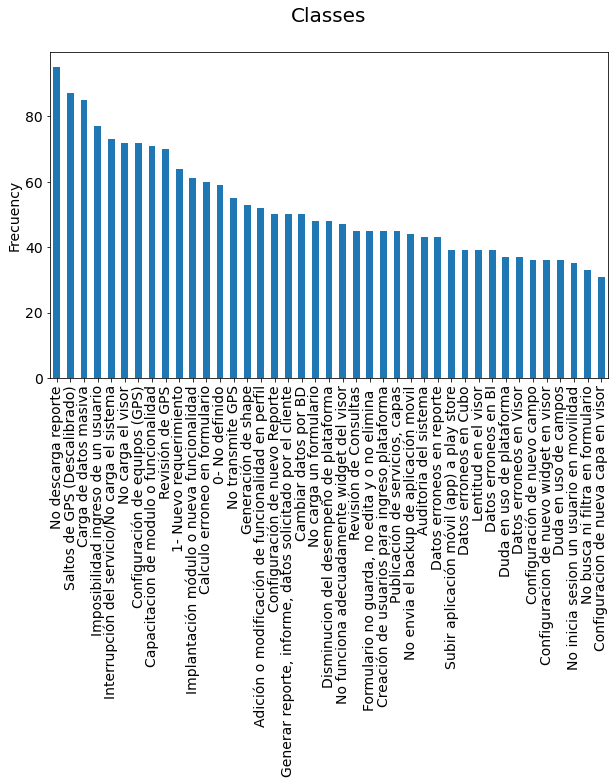

In [9]:
#V2
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14)
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuency', fontsize=14)
print(f'Number of categories {len(DataSet0["categoria"].value_counts())}')
print(DataSet0["categoria"].value_counts())

# Machine learning application

## 1. Original Dataset (OD)

In [10]:
'''
'X' and 'y' are defined, 'X' will be in charge of containing the characteristics of the dataset that for this case
is the description that will define the category to which it belongs and 'y' contains the values of the labels, 
in this case of the possible categories defined.
'''

X = DataSet0['descripcion'] 
y = DataSet0['categoria']

In [11]:
'''
The data for training and validation is defined, the training data will represent 80% of all the data 
and the validation data the remaining 20%
'''
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=8, stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 

(1716,) (430,) (1716,) (430,)


In [12]:
'''
Bearing in mind that the problem worked consists of text, it is necessary to transform them and prepare them for 
later use, in this case, each of the words contained in the description will be encoded in floating point values 
for use in machine learning algorithms, this process is also known as feature extraction or vectorization 
using the TfidfVectorizer library
'''

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [12]:
# ML Models CON TCC_NEW_V2
classifiers=[svm.SVC(), 
             ExtraTreesClassifier(), 
             RandomForestClassifier(),
             LogisticRegression(solver='liblinear'),
             DecisionTreeClassifier(),
             LinearDiscriminantAnalysis(),
             GaussianNB(),
             KNeighborsClassifier()
            ] 

classifier_metrics(X_train,X_test,y_train,y_test,HO=True,CV=False)  

---------------------------------------------------------------------------------

SVC()

Hold-Out in process...
Time, Training: 0.3261 [seconds]
Time, Prediction: 0.0500 [seconds]
accuracy_score: 0.8744
f1_score: 0.8738
recall_score: 0.8744
precision_score: 0.9032

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.9000    0.9000    0.9000        10
                                    Auditoria del sistema     1.0000    0.3333    0.5000         9
                            Calculo erroneo en formulario     0.8000    1.0000    0.8889        12
                                     Cambiar datos por BD     1.0000    0.9000    0.9474        10
               

Time, CV: 1.1823 [seconds]
CV: 0.8714 0.0228

---------------------------------------------------------------------------------

RandomForestClassifier()

Hold-Out in process...
Time, Training: 0.4061 [seconds]
Time, Prediction: 0.0170 [seconds]
accuracy_score: 0.8605
f1_score: 0.8590
recall_score: 0.8605
precision_score: 0.8712

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.9000    0.9000    0.9000        10
                                    Auditoria del sistema     0.5714    0.4444    0.5000         9
                            Calculo erroneo en formulario     0.8000    1.0000    0.8889        12
                                     Cambiar dato

Time, Training: 0.0420 [seconds]
Time, Prediction: 0.0010 [seconds]
accuracy_score: 0.7605
f1_score: 0.7621
recall_score: 0.7605
precision_score: 0.7884

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8889    0.8000    0.8421        10
                                    Auditoria del sistema     0.4167    0.5556    0.4762         9
                            Calculo erroneo en formulario     0.6471    0.9167    0.7586        12
                                     Cambiar datos por BD     1.0000    0.9000    0.9474        10
                   Capacitacion de modulo o funcionalidad     1.0000    0.7857    0.8800        14
                             

Time, CV: 3.2875 [seconds]
CV: 0.8225 0.0223

---------------------------------------------------------------------------------

GaussianNB()

Hold-Out in process...
Time, Training: 0.0130 [seconds]
Time, Prediction: 0.0660 [seconds]
accuracy_score: 0.6907
f1_score: 0.6863
recall_score: 0.6907
precision_score: 0.7136

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.7500    0.5000    0.6000        12
                                   1- Nuevo requerimiento     0.8000    0.6154    0.6957        13
        Adición o modificación de funcionalidad en perfil     0.7500    0.9000    0.8182        10
                                    Auditoria del sistema     0.8000    0.4444    0.5714         9
                            Calculo erroneo en formulario     0.5714    0.6667    0.6154        12
                                     Cambiar datos por BD    

## 2. Dataset with Preprocessing (DP)

In [13]:
# Convert texts to lowercase
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0.shape

(2146, 3)

In [14]:
# Remove punctuation marks
punct = string.punctuation

for c in punct:
    for fila in range(len(DataSet0)):
        DataSet0['descripcion'][fila] = DataSet0['descripcion'][fila].replace(c, " ")
DataSet0.shape

(2146, 3)

In [15]:
# Apply stemming to the description field
DataSet0['descripcion'] = DataSet0['descripcion'].apply(lambda x: lemmatizer(x)) 
DataSet0.shape

(2146, 3)

In [16]:
'''
'X' and 'y' are defined, 'X' will be in charge of containing the characteristics of the dataset that for this case
is the description that will define the category to which it belongs and 'y' contains the values of the labels, 
in this case of the possible categories defined.
'''

X = DataSet0['descripcion'] 
y = DataSet0['categoria'] 

In [17]:
'''
The data for training and validation is defined, the training data will represent 80% of all the data 
and the validation data the remaining 20%
'''
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=8, stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 

(1716,) (430,) (1716,) (430,)


In [18]:
'''
Bearing in mind that the problem worked consists of text, it is necessary to transform them and prepare them for 
later use, in this case, each of the words contained in the description will be encoded in floating point values 
for use in machine learning algorithms, this process is also known as feature extraction or vectorization 
using the TfidfVectorizer library
'''

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 

(1716, 920) (430, 920) (1716,) (430,)


In [19]:
#ML Models definition
classifiers=[svm.SVC(), 
             ExtraTreesClassifier(), 
             RandomForestClassifier(),
             LogisticRegression(solver='liblinear'),
             DecisionTreeClassifier(),
             LinearDiscriminantAnalysis(),
             GaussianNB(),
             KNeighborsClassifier()
            ] 

#Deploy aggregate metrics 
classifier_metrics(X_train,X_test,y_train,y_test,HO=True,CV=False) 

---------------------------------------------------------------------------------

SVC()

Hold-Out in process...
Time, Training: 0.3521 [seconds]
Time, Prediction: 0.0520 [seconds]
accuracy_score: 0.8907
f1_score: 0.8911
recall_score: 0.8907
precision_score: 0.9134

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.7273    0.8000    0.7619        10
                                    Auditoria del sistema     1.0000    0.4444    0.6154         9
                            Calculo erroneo en formulario     0.9231    1.0000    0.9600        12
                                     Cambiar datos por BD     1.0000    0.9000    0.9474        10
               

Time, CV: 0.8252 [seconds]
CV: 0.8779 0.0166

---------------------------------------------------------------------------------

RandomForestClassifier()

Hold-Out in process...
Time, Training: 0.4001 [seconds]
Time, Prediction: 0.0170 [seconds]
accuracy_score: 0.8465
f1_score: 0.8446
recall_score: 0.8465
precision_score: 0.8560

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.9231    1.0000    0.9600        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8182    0.9000    0.8571        10
                                    Auditoria del sistema     0.8000    0.4444    0.5714         9
                            Calculo erroneo en formulario     0.8571    1.0000    0.9231        12
                                     Cambiar dato

Time, Training: 0.0420 [seconds]
Time, Prediction: 0.0000 [seconds]
accuracy_score: 0.8000
f1_score: 0.7977
recall_score: 0.8000
precision_score: 0.8185

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8889    0.8000    0.8421        10
                                    Auditoria del sistema     0.5714    0.4444    0.5000         9
                            Calculo erroneo en formulario     0.8000    1.0000    0.8889        12
                                     Cambiar datos por BD     0.9091    1.0000    0.9524        10
                   Capacitacion de modulo o funcionalidad     0.8667    0.9286    0.8966        14
                             

Time, CV: 3.3798 [seconds]
CV: 0.8304 0.0190

---------------------------------------------------------------------------------

GaussianNB()

Hold-Out in process...
Time, Training: 0.0130 [seconds]
Time, Prediction: 0.0660 [seconds]
accuracy_score: 0.6605
f1_score: 0.6519
recall_score: 0.6605
precision_score: 0.6827

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.5556    0.4167    0.4762        12
                                   1- Nuevo requerimiento     0.6154    0.6154    0.6154        13
        Adición o modificación de funcionalidad en perfil     0.7273    0.8000    0.7619        10
                                    Auditoria del sistema     0.7500    0.3333    0.4615         9
                            Calculo erroneo en formulario     0.6154    0.6667    0.6400        12
                                     Cambiar datos por BD    

## 3. Dataset with Preprocessing and Balancing (DPB)

In [29]:
# Convert texts to lowercase
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0.shape

(2146, 3)

In [30]:
# Remove punctuation marks
punct = string.punctuation

for c in punct:
    for fila in range(len(DataSet0)):
        DataSet0['descripcion'][fila] = DataSet0['descripcion'][fila].replace(c, " ")
DataSet0.shape

(2146, 3)

In [31]:
# Apply stemming to the description field
DataSet0['descripcion'] = DataSet0['descripcion'].apply(lambda x: lemmatizer(x)) 
DataSet0.shape

(2146, 3)

In [32]:
'''
'X' and 'y' are defined, 'X' will be in charge of containing the characteristics of the dataset that for this case
is the description that will define the category to which it belongs and 'y' contains the values of the labels, 
in this case of the possible categories defined.
'''

X = DataSet0['descripcion'] 
y = DataSet0['categoria'] 

In [33]:
'''
Bearing in mind that the problem worked consists of text, it is necessary to transform them and prepare them for 
later use, in this case, each of the words contained in the description will be encoded in floating point values 
for use in machine learning algorithms, this process is also known as feature extraction or vectorization 
using the TfidfVectorizer library
'''

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X = vectorizer.fit_transform(X) 

print(X.shape,y.shape) 


(2146, 1092) (2146,)


In [42]:
#ML Models CON TCC_NEW_V2
classifiers=[svm.SVC(), 
             ExtraTreesClassifier(), 
             RandomForestClassifier(),
             LogisticRegression(solver='liblinear'),
             DecisionTreeClassifier(),
             LinearDiscriminantAnalysis(),
             GaussianNB(),
             KNeighborsClassifier()
            ] 

methods_list=[#"RandomOverSampler",  
              "SMOTE"
#               "SMOTEN",
#               "ADASYN",
#               "BorderlineSMOTE",
              #"KMeansSMOTE", #No in scenario 1,2, and 4, only use if you have a lot of data
#               "SVMSMOTE"
             ]
             
# class_balance_over_sampling(features, labels, HO=True, CV=False, methods_list=methods_list)
class_balance_over_sampling(X, y, HO=True, CV=False, methods_list=methods_list)

SMOTE
---------------------------------------------------------------------------------

SVC()

Hold-Out in process...
Time, Training: 0.7022 [seconds]
Time, Prediction: 0.0660 [seconds]
accuracy_score: 0.8884
f1_score: 0.8892
recall_score: 0.8884
precision_score: 0.9098

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.7500    0.9000    0.8182        10
                                    Auditoria del sistema     1.0000    0.4444    0.6154         9
                            Calculo erroneo en formulario     0.9231    1.0000    0.9600        12
                                     Cambiar datos por BD     1.0000    0.9000    0.9474        10
         

Time, CV: 1.2283 [seconds]
CV: 0.9532 0.0394

---------------------------------------------------------------------------------

RandomForestClassifier()

Hold-Out in process...
Time, Training: 0.7112 [seconds]
Time, Prediction: 0.0180 [seconds]
accuracy_score: 0.8581
f1_score: 0.8541
recall_score: 0.8581
precision_score: 0.8686

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.9231    1.0000    0.9600        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8182    0.9000    0.8571        10
                                    Auditoria del sistema     1.0000    0.5556    0.7143         9
                            Calculo erroneo en formulario     0.8571    1.0000    0.9231        12
                                     Cambiar dato

Time, CV: 0.2641 [seconds]
CV: 0.9332 0.0258

---------------------------------------------------------------------------------

DecisionTreeClassifier()

Hold-Out in process...
Time, Training: 0.0920 [seconds]
Time, Prediction: 0.0010 [seconds]
accuracy_score: 0.8116
f1_score: 0.8100
recall_score: 0.8116
precision_score: 0.8336

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    0.9167    0.9565        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8000    0.8000    0.8000        10
                                    Auditoria del sistema     0.6250    0.5556    0.5882         9
                            Calculo erroneo en formulario     0.7857    0.9167    0.8462        12
                                     Cambiar dato

Time, CV: 7.0781 [seconds]
CV: 0.9301 0.0643

---------------------------------------------------------------------------------

GaussianNB()

Hold-Out in process...
Time, Training: 0.0260 [seconds]
Time, Prediction: 0.0880 [seconds]
accuracy_score: 0.6884
f1_score: 0.6831
recall_score: 0.6884
precision_score: 0.7177

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.5000    0.4167    0.4545        12
                                   1- Nuevo requerimiento     0.8182    0.6923    0.7500        13
        Adición o modificación de funcionalidad en perfil     0.6154    0.8000    0.6957        10
                                    Auditoria del sistema     1.0000    0.3333    0.5000         9
                            Calculo erroneo en formulario     0.5385    0.5833    0.5600        12
                                     Cambiar datos por BD    

Time, CV: 0.1560 [seconds]
CV: 0.8635 0.0517



## 4. Dataset with Preprocessing and Balancing, Optimization of parameters (DPBO)

In [36]:
# Convert texts to lowercase
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0.shape

(2146, 3)

In [37]:
# Remove punctuation marks
punct = string.punctuation

for c in punct:
    for fila in range(len(DataSet0)):
        DataSet0['descripcion'][fila] = DataSet0['descripcion'][fila].replace(c, " ")
DataSet0.shape

(2146, 3)

In [38]:
# Apply stemming to the description field
DataSet0['descripcion'] = DataSet0['descripcion'].apply(lambda x: lemmatizer(x)) 
DataSet0.shape

(2146, 3)

In [39]:
'''
'X' and 'y' are defined, 'X' will be in charge of containing the characteristics of the dataset that for this case
is the description that will define the category to which it belongs and 'y' contains the values of the labels, 
in this case of the possible categories defined.
'''

X = DataSet0['descripcion'] 
y = DataSet0['categoria'] 

In [40]:
'''
Bearing in mind that the problem worked consists of text, it is necessary to transform them and prepare them for 
later use, in this case, each of the words contained in the description will be encoded in floating point values 
for use in machine learning algorithms, this process is also known as feature extraction or vectorization 
using the TfidfVectorizer library
'''

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X = vectorizer.fit_transform(X) 

# Save word dictionary created by TfidfVectorizer
# pickle.dump(vectorizer.vocabulary_,open("Features_SVM_V3.pkl","wb"))

In [41]:

classifiers=[svm.SVC(C=1000000, gamma=0.000001, kernel = 'rbf'), 
             ExtraTreesClassifier(min_samples_leaf = 1,min_samples_split= 2, n_estimators= 120), # n_jobs=-1), 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120 
             RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 2, n_estimators= 800), # n_jobs=-1), 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800
             LogisticRegression(C = 25, penalty= 'l1', solver='liblinear'),
             DecisionTreeClassifier(min_samples_leaf= 2, min_samples_split = 3),
             LinearDiscriminantAnalysis(shrinkage = 0.02, solver = 'lsqr'),
             GaussianNB(var_smoothing = 2.848035868435799e-05),
             KNeighborsClassifier(metric = 'manhattan', n_neighbors= 3, weights = 'distance')
            ]

methods_list=[#"RandomOverSampler",  
              "SMOTE"
#               "SMOTEN",
#               "ADASYN",
#               "BorderlineSMOTE",
              #"KMeansSMOTE", #No in scenario 1,2, and 4, only use if you have a lot of data
#               "SVMSMOTE"
             ]
             
# class_balance_over_sampling(features, labels, HO=True, CV=False, methods_list=methods_list)
class_balance_over_sampling(X, y, HO=True, CV=False, methods_list=methods_list)

SMOTE
---------------------------------------------------------------------------------

SVC(C=1000000, gamma=1e-06)

Hold-Out in process...
Time, Training: 0.5371 [seconds]
Time, Prediction: 0.0810 [seconds]
accuracy_score: 0.9047
f1_score: 0.9029
recall_score: 0.9047
precision_score: 0.9121

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8333    1.0000    0.9091        10
                                    Auditoria del sistema     0.8000    0.4444    0.5714         9
                            Calculo erroneo en formulario     0.8000    1.0000    0.8889        12
                                     Cambiar datos por BD     1.0000    0.9000    0.94

Time, CV: 1.4423 [seconds]
CV: 0.9543 0.0402

---------------------------------------------------------------------------------

RandomForestClassifier(n_estimators=800)

Hold-Out in process...
Time, Training: 5.6147 [seconds]
Time, Prediction: 0.1760 [seconds]
accuracy_score: 0.8651
f1_score: 0.8610
recall_score: 0.8651
precision_score: 0.8763

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.9231    1.0000    0.9600        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8182    0.9000    0.8571        10
                                    Auditoria del sistema     1.0000    0.4444    0.6154         9
                            Calculo erroneo en formulario     0.8571    1.0000    0.9231        12
                                 

Time, CV: 0.3731 [seconds]
CV: 0.9507 0.0437

---------------------------------------------------------------------------------

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3)

Hold-Out in process...
Time, Training: 0.0940 [seconds]
Time, Prediction: 0.0010 [seconds]
accuracy_score: 0.7860
f1_score: 0.7768
recall_score: 0.7860
precision_score: 0.7981

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     1.0000    1.0000    1.0000        12
                                   1- Nuevo requerimiento     1.0000    1.0000    1.0000        13
        Adición o modificación de funcionalidad en perfil     0.8000    0.8000    0.8000        10
                                    Auditoria del sistema     0.7500    0.6667    0.7059         9
                            Calculo erroneo en formulario     0.8000    1.0000    0.8889        12
          

Time, CV: 8.6142 [seconds]
CV: 0.9428 0.0531

---------------------------------------------------------------------------------

GaussianNB(var_smoothing=2.848035868435799e-05)

Hold-Out in process...
Time, Training: 0.0330 [seconds]
Time, Prediction: 0.1070 [seconds]
accuracy_score: 0.6930
f1_score: 0.6890
recall_score: 0.6930
precision_score: 0.7238

 clasification report:
                                                            precision    recall  f1-score   support

                                           0- No definido     0.5000    0.4167    0.4545        12
                                   1- Nuevo requerimiento     0.8182    0.6923    0.7500        13
        Adición o modificación de funcionalidad en perfil     0.6154    0.8000    0.6957        10
                                    Auditoria del sistema     1.0000    0.3333    0.5000         9
                            Calculo erroneo en formulario     0.5385    0.5833    0.5600        12
                          

Time, CV: 0.2071 [seconds]
CV: 0.9151 0.0706

